In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
%matplotlib inline

In [25]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

fatal: destination path 'Machine-learning-with-Python' already exists and is not an empty directory.


In [26]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Diabetes/diabetes.csv')
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
df_mod = df[(df.Blood_Pressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)

(724, 9)


In [28]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome

In [29]:
#def min_max_scaling(df_mod):
    
    #df_norm = df_mod.copy()
    
    
    #for column in df_norm.columns:
        #df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    #return df_norm

#df_scaled = min_max_scaling(df_mod)

#df_scaled

In [30]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder


In [34]:
model = Sequential()

model.add(Dense(8, input_dim = 8))
#keras.layers.Dropout(0.2)
#model.add(Dense(4, activation='relu'))
#keras.layers.Dropout(0.2)
#model.add(Dense(2, activation='relu'))
#keras.layers.Dropout(0.2)
#model.add(Dense(2, activation='relu'))


#keras.layers.Dropout(0.2)
#model.add(Dense(7, activation = 'relu'))
#keras.layers.Dropout(0.3)
#model.add(Dense(4, activation = 'relu'))
#model.add(Dense(164, activation = 'relu'))
#keras.layers.Dropout(0.35
model.add(Dense(1, activation = 'sigmoid'))

This is a nice tool to view the model we have created and count the parameters.

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer= 'adam', loss ='binary_crossentropy',metrics='accuracy' ) 


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=1000, batch_size=10)

Epoch 1/1000
55/55 [==============================] - 1s 5ms/step - loss: 0.6988 - accuracy: 0.6005 - val_loss: 0.6210 - val_accuracy: 0.6740
Epoch 2/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.6761 - val_loss: 0.5522 - val_accuracy: 0.7072
Epoch 3/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7146 - val_loss: 0.5134 - val_accuracy: 0.7403
Epoch 4/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.5381 - accuracy: 0.7268 - val_loss: 0.4912 - val_accuracy: 0.7624
Epoch 5/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.7444 - val_loss: 0.4761 - val_accuracy: 0.7680
Epoch 6/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7714 - val_loss: 0.4652 - val_accuracy: 0.7845
Epoch 7/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7549 - val_loss: 0.4584 - val_accuracy: 0.7901
Epoch 

In [38]:
from tensorflow.keras.models import load_model

In [39]:
loss_df = pd.DataFrame(model.history.history)

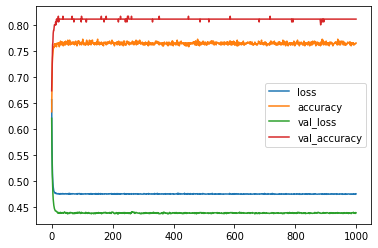

In [40]:
loss_df.plot()



In [41]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8122


[0.43863141536712646, 0.8121547102928162]

In [42]:
model.evaluate(X_train,y_train)


17/17 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7661


[0.47346511483192444, 0.7661141753196716]

In [43]:
pred = model.predict(X_test)
pred = (pred > 0.5)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       120
           1       0.75      0.66      0.70        61

    accuracy                           0.81       181
   macro avg       0.80      0.77      0.78       181
weighted avg       0.81      0.81      0.81       181



In [46]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test,pred)

array([[107,  13],
       [ 21,  40]])